## Loading Data

In [1]:
# Standard includes
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Routines for linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Set label size for plots
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

In [2]:
data = np.genfromtxt('../Dataset/diabetes.data', delimiter='\t')
data=np.delete(data,0,0)
features = ['age', 'sex', 'body mass index', 'blood pressure', 
            'serum1', 'serum2', 'serum3', 'serum4', 'serum5', 'serum6']
x = data[:,0:10] # predictors
y = data[:,10] # response variable

In [3]:
print("Shape of x=",x.shape," Shape of y=",y.shape)

Shape of x= (442, 10)  Shape of y= (442,)


## Using only one Feature

In [4]:
def one_feature_regression(x,y,f):
    if (f < 0) or (f > 9):
        print("Feature index is out of bounds")
        return
    C=10
    regr = linear_model.Ridge(alpha=C)
    x1 = x[:,[f]]
    regr.fit(x1, y)
    # Make predictions using the model
    y_pred = regr.predict(x1)
    # Plot data points as well as predictions
    plt.plot(x1, y, 'bo')
    plt.plot(x1, y_pred, 'r-', linewidth=3)
    plt.xlabel(features[f], fontsize=14)
    plt.ylabel('Progression of disease', fontsize=14)
    plt.show()
    print("Mean squared error: ", mean_squared_error(y, y_pred))
    return(regr,mean_squared_error(y, y_pred))

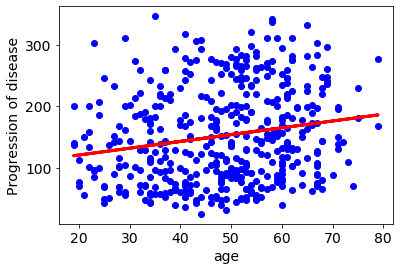

Mean squared error:  5720.547020849612
w =  [1.10481093]
b =  98.5301574380905


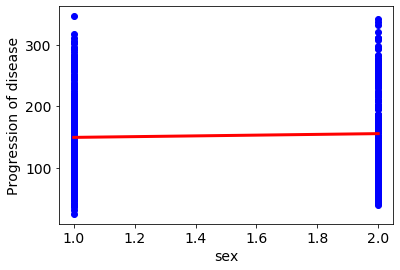

Mean squared error:  5918.9651887449745
w =  [6.09186846]
b =  143.18863657778198


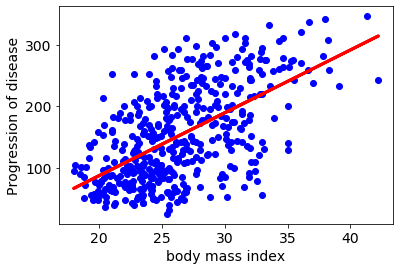

Mean squared error:  3890.4593312820407
w =  [10.22125406]
b =  -117.46018529818238


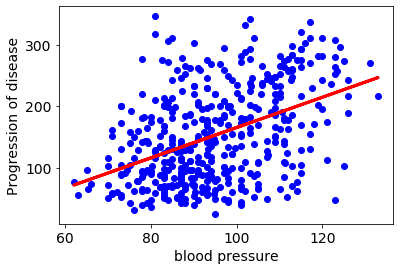

Mean squared error:  4774.113918603292
w =  [2.46044567]
b =  -80.7403507616383


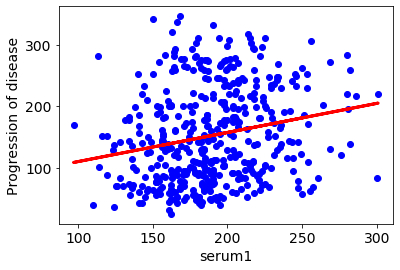

Mean squared error:  5663.315623834898
w =  [0.472293]
b =  62.8038574462236


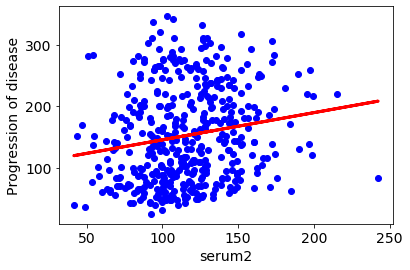

Mean squared error:  5750.241102785744
w =  [0.44119124]
b =  101.20274628306738


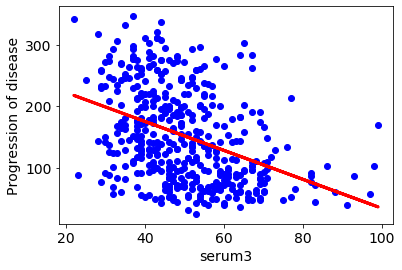

Mean squared error:  5005.661637686186
w =  [-2.35278252]
b =  269.27490595742745


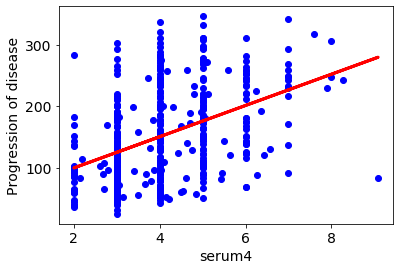

Mean squared error:  4831.336679730304
w =  [25.37029941]
b =  48.87005169193418


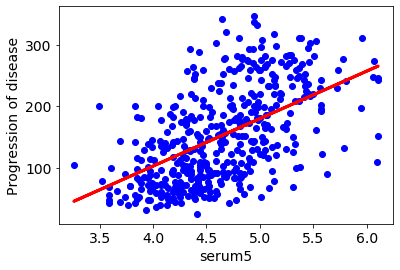

Mean squared error:  4042.1752786198053
w =  [77.10450447]
b =  -205.74020020245123


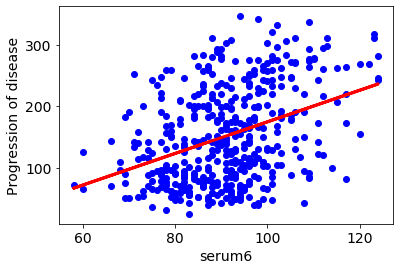

Mean squared error:  5062.380620048017
w =  [2.56444714]
b =  -81.8984263435847


In [5]:
for i in range(10):
    regr,mse = one_feature_regression(x,y,i)
    print("w = ", regr.coef_)
    print("b = ", regr.intercept_)

## Using multiple features

In [6]:
def feature_subset_regression(x,y,flist,C):
    if len(flist) < 1:
        print("Need at least one feature")
        return
    for f in flist:
        if (f < 0) or (f > 9):
            print("Feature index is out of bounds")
            return
    regr = linear_model.Ridge(alpha=C)
    regr.fit(x[:,flist], y)
    return regr

In [7]:
from itertools import combinations 
for k in range(1,11):
    comb = combinations(range(10), k)
    mselist=[]
    regrlist=[]
    combina=[]
    C=10
    for i in list(comb):
        regr = feature_subset_regression(x,y,list(i),C)
        mse=mean_squared_error(y, regr.predict(x[:,list(i)]))
        mselist.append(mse)
        regrlist.append(regr)
        combina.append(i)
    minpos = mselist.index(min(mselist))
    print("Using",k,"features at a time the best linear regression:")
    print("w = ", regrlist[minpos].coef_)
    print("b = ", regrlist[minpos].intercept_)
    print("Mean squared error: ", mean_squared_error(y, regrlist[minpos].predict(x[:,combina[minpos]])))
    print("======================================================================")

Using 1 features at a time the best linear regression:
w =  [10.22125406]
b =  -117.46018529818238
Mean squared error:  3890.4593312820407
Using 2 features at a time the best linear regression:
w =  [ 7.54321652 50.82483243]
b =  -282.72375384427926
Mean squared error:  3211.160149627458
Using 3 features at a time the best linear regression:
w =  [ 6.69241742  0.95205619 44.63121824]
b =  -321.645420658798
Mean squared error:  3088.015331544438
Using 4 features at a time the best linear regression:
w =  [ 6.11775484  0.97367104 -0.76522603 39.45299502]
b =  -246.40033253572622
Mean squared error:  3019.580913831343
Using 5 features at a time the best linear regression:
w =  [-20.37766467   5.80553238   1.14926756  -1.08179101  38.66461948]
b =  -205.4433956539759
Mean squared error:  2918.6999148041864
Using 6 features at a time the best linear regression:
w =  [-19.43895015   6.08391678   1.18129103  -0.38782452  10.78252993
  44.15337017]
b =  -267.0658709576011
Mean squared error:  

In [8]:
msel=[]
for i in range(100000):
    regr = feature_subset_regression(x,y,range(10),i)
    mse=mean_squared_error(y, regr.predict(x[:,range(10)]))
    msel.append(mse)

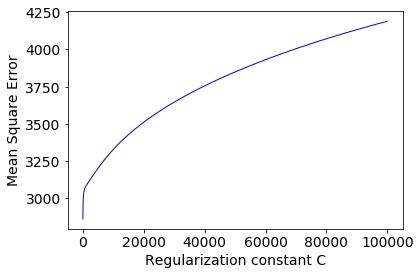

In [9]:
zerol=[0]*300
plt.plot(range(100000), msel, 'b-', linewidth=1)
plt.xlabel('Regularization constant C', fontsize=14)
plt.ylabel('Mean Square Error', fontsize=14)
plt.show()

## Splitting into test set and training set

In [10]:
def split_data(n_train):
    if (n_train < 0) or (n_train > 442):
        print("Invalid number of training points")
        return
    np.random.seed(0)
    perm = np.random.permutation(442)
    training_indices = perm[range(0,n_train)]
    test_indices = perm[range(n_train,442)]
    trainx = x[training_indices,:]
    trainy = y[training_indices]
    testx = x[test_indices,:]
    testy = y[test_indices]
    return trainx, trainy, testx, testy

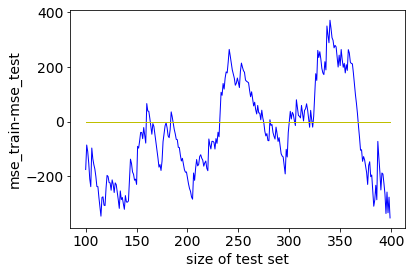

In [11]:
differ=[]
msetrlist=[]
msetelist=[]
for i in range(100,400):
    trainx, trainy, testx, testy = split_data(i)
    regr = feature_subset_regression(trainx,trainy,range(0,10),10)
    mse_train=mean_squared_error(trainy, regr.predict(trainx))
    mse_test=mean_squared_error(testy, regr.predict(testx))
    diff=mse_train-mse_test
    msetrlist.append(mse_train)
    msetelist.append(mse_test)
    differ.append(diff)

zerol=[0]*300
plt.plot(range(100,400), differ, 'b-', linewidth=1)
plt.plot(range(100,400),zerol , 'y-', linewidth=1)
plt.xlabel('size of test set', fontsize=14)
plt.ylabel('mse_train-mse_test', fontsize=14)
plt.show()

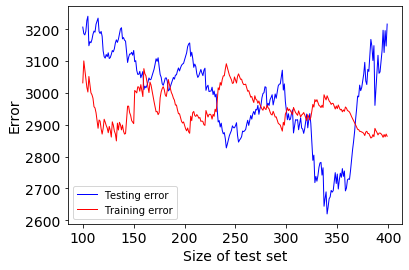

In [12]:
plt.plot(range(100,400), msetelist, 'b-', linewidth=1, label="Testing error")
plt.plot(range(100,400), msetrlist, 'r-', linewidth=1,label="Training error")
plt.xlabel('Size of test set', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.legend()
plt.show()

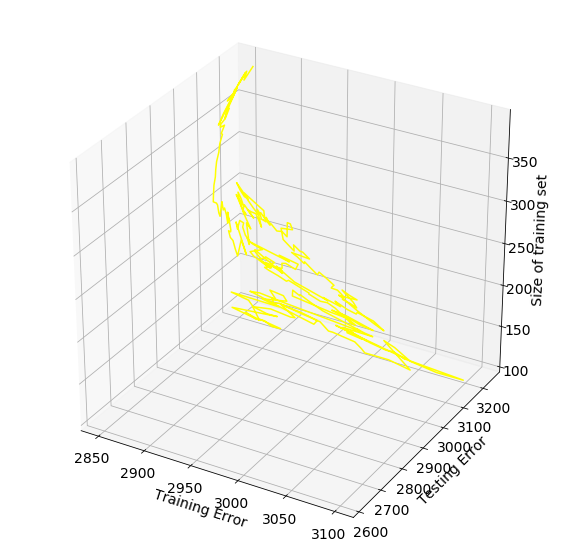

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Training Error', fontsize=14)
ax.set_ylabel('Testing Error', fontsize=14)
ax.set_zlabel('Size of training set', fontsize=14)
ax.plot3D(msetrlist, msetelist,range(100,400), 'yellow')

In [21]:
trainx, trainy, testx, testy = split_data(350)
msetrlist=[]
msetelist=[]
for i in range(0,50000):
    regr = feature_subset_regression(trainx,trainy,range(0,10),i)
    mse_train=mean_squared_error(trainy, regr.predict(trainx))
    mse_test=mean_squared_error(testy, regr.predict(testx))
    msetrlist.append(mse_train)
    msetelist.append(mse_test)

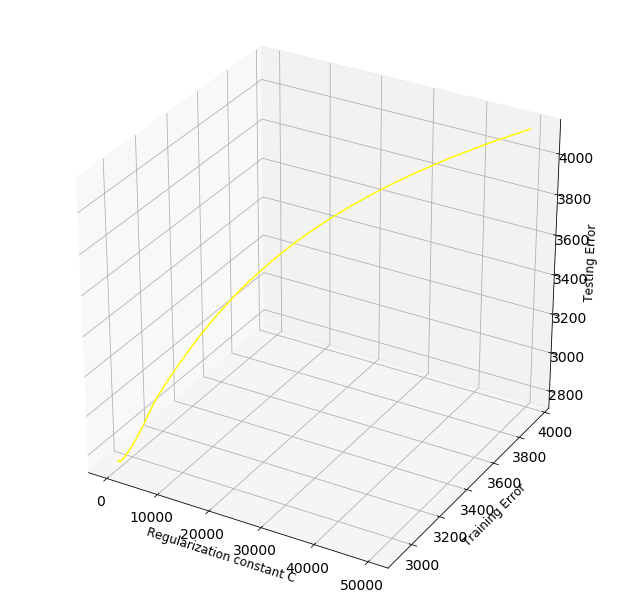

In [22]:
fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Regularization constant C', fontsize=12)
ax.set_ylabel('Training Error', fontsize=12)
ax.set_zlabel('Testing Error', fontsize=12)
ax.plot3D(range(0,50000),msetrlist, msetelist,'yellow')

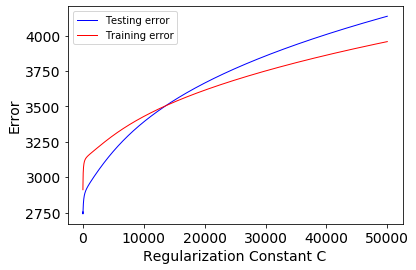

In [23]:
plt.plot(range(0,50000), msetelist, 'b-', linewidth=1, label="Testing error")
plt.plot(range(0,50000), msetrlist, 'r-', linewidth=1,label="Training error")
plt.xlabel('Regularization Constant C', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.legend()
plt.show()